<img src="assets/zp4tocl29s4kkwtd1qpi.webp" style="display:block; margin:auto" width=350>

<h1><center>Project: Predicting Listing Gains in the Indian IPO Market Using TensorFlow</center></h1>

#### Scenario
In this project, you will work as a data scientist for an investment firm interested in the Indian market's Initial Public Offerings (IPOs). The firm aims to predict whether an IPO will yield listing gains, which is the percentage increase in the share price of a company from its IPO issue price on the day of listing. Successful prediction of IPO listing gains can provide valuable insights for strategic investment decisions, enabling the firm to identify high-potential IPOs and optimize its investment portfolio.

#### Objective
The primary objective of this project is to build a deep learning classification model to determine if an IPO will list at a profit (positive gain) or not. The model will leverage historical IPO data to learn patterns and relationships that can help predict future IPO performance.

#### Data
The [dataset](https://www.moneycontrol.com/ipo/ipo-historic-table?classic=true) we'll be using for this project contains information on past IPOs in the Indian market and comes from moneycontrol. The dataset includes various features that capture the characteristics of IPOs, such as subscription rates by different investor categories, the issue price, and the issue size. Each feature provides insights into the demand and market perception of these IPOs.

#### Dataset Details
The dataset consists of the following columns:

|Variable Name|	Description|
|----|----|
|`Date`| date when the IPO was listed|
|`IPOName`|name of the IPO|
|`Issue_Size`| size of the IPO issue, in INR Crores|
|`Subscription_QIB`| number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category|
|`Subscription_HNI`| number of times the IPO was subscribed by the HNI (High Networth Individual) investor category|
|`Subscription_RII`| number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category|
|`Subscription_Total`| total number of times the IPO was subscribed overall|
|`Issue_Price`| the price in INR at which the IPO was issued|
|`Listing_Gains_Percent`|is the percentage gain in the listing price over the issue price|

#### Project Overview
This project will cover all major stages of the data science modeling pipeline, starting with exploratory data analysis (EDA) to understand the data, followed by feature engineering to extract meaningful information, and data preprocessing to prepare the data for modeling. Next, we will visualize the important variables, create and fine-tune a deep learning classification model using TensorFlow, and evaluate its performance on a test set.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [1]:
# Load relevant packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Scikit-Learn for model building, evaluation, and preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import RandomSearch

#### Initial EDA
Let's load in the dataset and perform some preliminary data exploration tasks to get started!

In [2]:
# Load the data
ipo = pd.read_csv('Indian_IPO_Market_Data.csv')

In [3]:
# Show data
ipo

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


In [4]:
# Check data shape
ipo.shape

(319, 9)

In [5]:
# Check data columns
ipo.columns

Index(['Date ', 'IPOName', 'Issue_Size', 'Subscription_QIB',
       'Subscription_HNI', 'Subscription_RII', 'Subscription_Total',
       'Issue_Price', 'Listing_Gains_Percent'],
      dtype='object')

In [6]:
# Remove whitespace in date
ipo.rename(columns={'Date ' : 'Date'}, inplace=True)

In [7]:
# Recheck columns
ipo.columns

Index(['Date', 'IPOName', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent'],
      dtype='object')

In [8]:
# Check data info
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [9]:
# summary statistics for all columns
ipo.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


#### Brief Explanation and Considerations

`Date`

- This column represents the date of the IPO. While it might provide some temporal information (like seasonality or trends over time), in its current format, it is not suitable for modeling. Hence we'll transform the column into a useful feature (extracting month, year and quarter) .

`IPOName`

- The `IPOName` column contains the names of IPOs. Since each IPO is unique (as indicated by the 319 unique values out of 319 records), it will not provide useful information for modeling. It is a categorical feature with as many unique values as there are observations, which doesn't help in a predictive context.

`Issue_Size`

- This column represents the size of the IPO and has significant variability (as indicated by its high standard deviation). It can be a crucial variable for modeling, as larger IPOs might exhibit different behavior compared to smaller ones.

`Subscription_QIB` (Qualified Institutional Buyers)

- The `Subscription_QIB` column represents the subscription rate by Qualified Institutional Buyers. This variable shows substantial variability, which indicates it could provide predictive power. High or low QIB subscription rates might correlate with listing gains or other outcomes.

`Subscription_HNI` (High Net-worth Individuals)

- Similar to `Subscription_QI`B, the `Subscription_HNI` column shows a high standard deviation and a wide range. This suggests it can differentiate between different IPO outcomes.

`Subscription_RII` (Retail Individual Investors)

- The `Subscription_RII` column also represents subscription rates, but from Retail Individual Investors. Like the other subscription variables, it shows variability and potential relevance.

`Subscription_Total`

- `Subscription_Total` is the overall subscription rate, which may be derived from the combination of `Subscription_QIB`, `Subscription_HNI`, and `Subscription_RII`. If `Subscription_Total` is a simple sum or combination of these columns, it could be redundant. However, it could also provide an aggregated perspective that is more interpretable. We'll keep it for now. If it is highly correlated with the individual subscription rates, we'll consider removing one or the other to avoid multicollinearity.

`Issue_Price`

- The Issue_Price column indicates the price at which shares were issued. It is a continuous variable with significant variability. The issue price can directly impact investor perceptions and listing performance.

`Listing_Gains_Percent`

This is our target variable, since we aim to create a classification model, we'll transform this column into a binary variable. 1 for positiv percentages and 0 for negative percentages.

Since we are going to build a deep learning classification model, our target variable, `Listing_Gains_Percent`, needs to be in a categorical format. Currently, it is in a continuous format, so let's convert it accordingly.

In [10]:
# Transform target variabel
ipo['Listing_Gains_Profit'] = ipo['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)

# Check new target
ipo['Listing_Gains_Profit']

0      1
1      0
2      1
3      0
4      0
      ..
314    1
315    1
316    0
317    1
318    1
Name: Listing_Gains_Profit, Length: 319, dtype: int64

In [11]:
# Check distribution of target
round(ipo['Listing_Gains_Profit'].value_counts(normalize=True) * 100, 2)

Listing_Gains_Profit
1    54.55
0    45.45
Name: proportion, dtype: float64

To understand whether an average IPO tends to list at a profit or not, we need to analyze the distribution of the target variable, `Listing_Gains_Profit`. This involves calculating the percentage of IPOs that resulted in a profit compared to those that did not.

By using the `value_counts()` method with the `normalize=True` parameter, we can obtain the relative frequencies of each category in the `Listing_Gains_Profi`t column, expressed as a percentage. This helps in determining the proportion of IPOs that listed at a profit (1) versus those that did not (0).

Based on the output:

- 54.55% of the IPOs listed at a profit, indicating that more than half of the IPOs resulted in gains on the listing day.
- 45.45% of the IPOs did not list at a profit, meaning a significant portion of IPOs did not perform well on the listing day.

From this analysis, we can conclude that an average IPO is slightly more likely to list at a profit than not, with a relatively balanced distribution between the two outcomes. This insight is crucial as a baseline understanding before building a deep learning classification model to predict IPO listing gains.

In [12]:
# Check head of dataset
ipo.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [13]:
# Calculate missing values
ipo.isna().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

For further analysis, we will remove the `IPOName` column, as it contains unique values for each entry and does not provide useful information for predicting the target variable. Additionally, we will drop the "old" target variable, `Listing_Gains_Percent`, and proceed with the new target variable, `Listing_Gains_Profit`.

In [14]:
# Drop columns
ipo.drop(columns=['Listing_Gains_Percent', 'IPOName'], inplace=True)

In the next step, we'll convert the Date column in the IPO dataset to a datetime format to allow for easier extraction and manipulation of date-related information.

In [15]:
# Transform date column to year, month, quarter
ipo['Date'] = pd.to_datetime(ipo['Date'], format="%d/%m/%y", errors='coerce')

ipo['Year'] = ipo['Date'].dt.year
ipo['Month'] = ipo['Date'].dt.month
ipo['Quarter'] = ipo['Date'].dt.quarter

# Drop date column
ipo.drop(columns=['Date'], inplace=True)

In [16]:
# Check head dataset
ipo.head()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit,Year,Month,Quarter
0,189.80,48.44,106.02,11.08,43.22,165,1,2010,2,1
1,328.70,59.39,51.95,3.79,31.11,145,0,2010,2,1
2,56.25,0.99,16.60,6.25,5.17,75,1,2010,2,1
3,199.80,1.12,3.65,0.62,1.22,165,0,2010,2,1
4,0.00,0.52,1.52,2.26,1.12,75,0,2010,2,1


After converting the Date column, new columns were created to extract specific components of the date:

- `Year`: Extracted using ipo['Date'].dt.year to represent the year of the IPO.
- `Month`: Extracted using ipo['Date'].dt.month to represent the month of the IPO.
- `Quarter`: Extracted using ipo['Date'].dt.quarter to represent the financial quarter of the IPO.
- 
These new columns (Year, Month, Quarter) provide additional features that can be used for further analysis or as inputs to the model, allowing the model to capture temporal patterns in IPO performance more effectively. The dataset now contains a total of 11 columns with these new date-related features.

#### EDA: Visualization

In this chapter we'll check for the distribution of predictors with respect to the target variable, since they could be informative for modeling.

In [17]:
# check data info
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int64  
 7   Year                  319 non-null    int32  
 8   Month                 319 non-null    int32  
 9   Quarter               319 non-null    int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 21.3 KB


**1. Plot Distribution of Features and Target Variable**

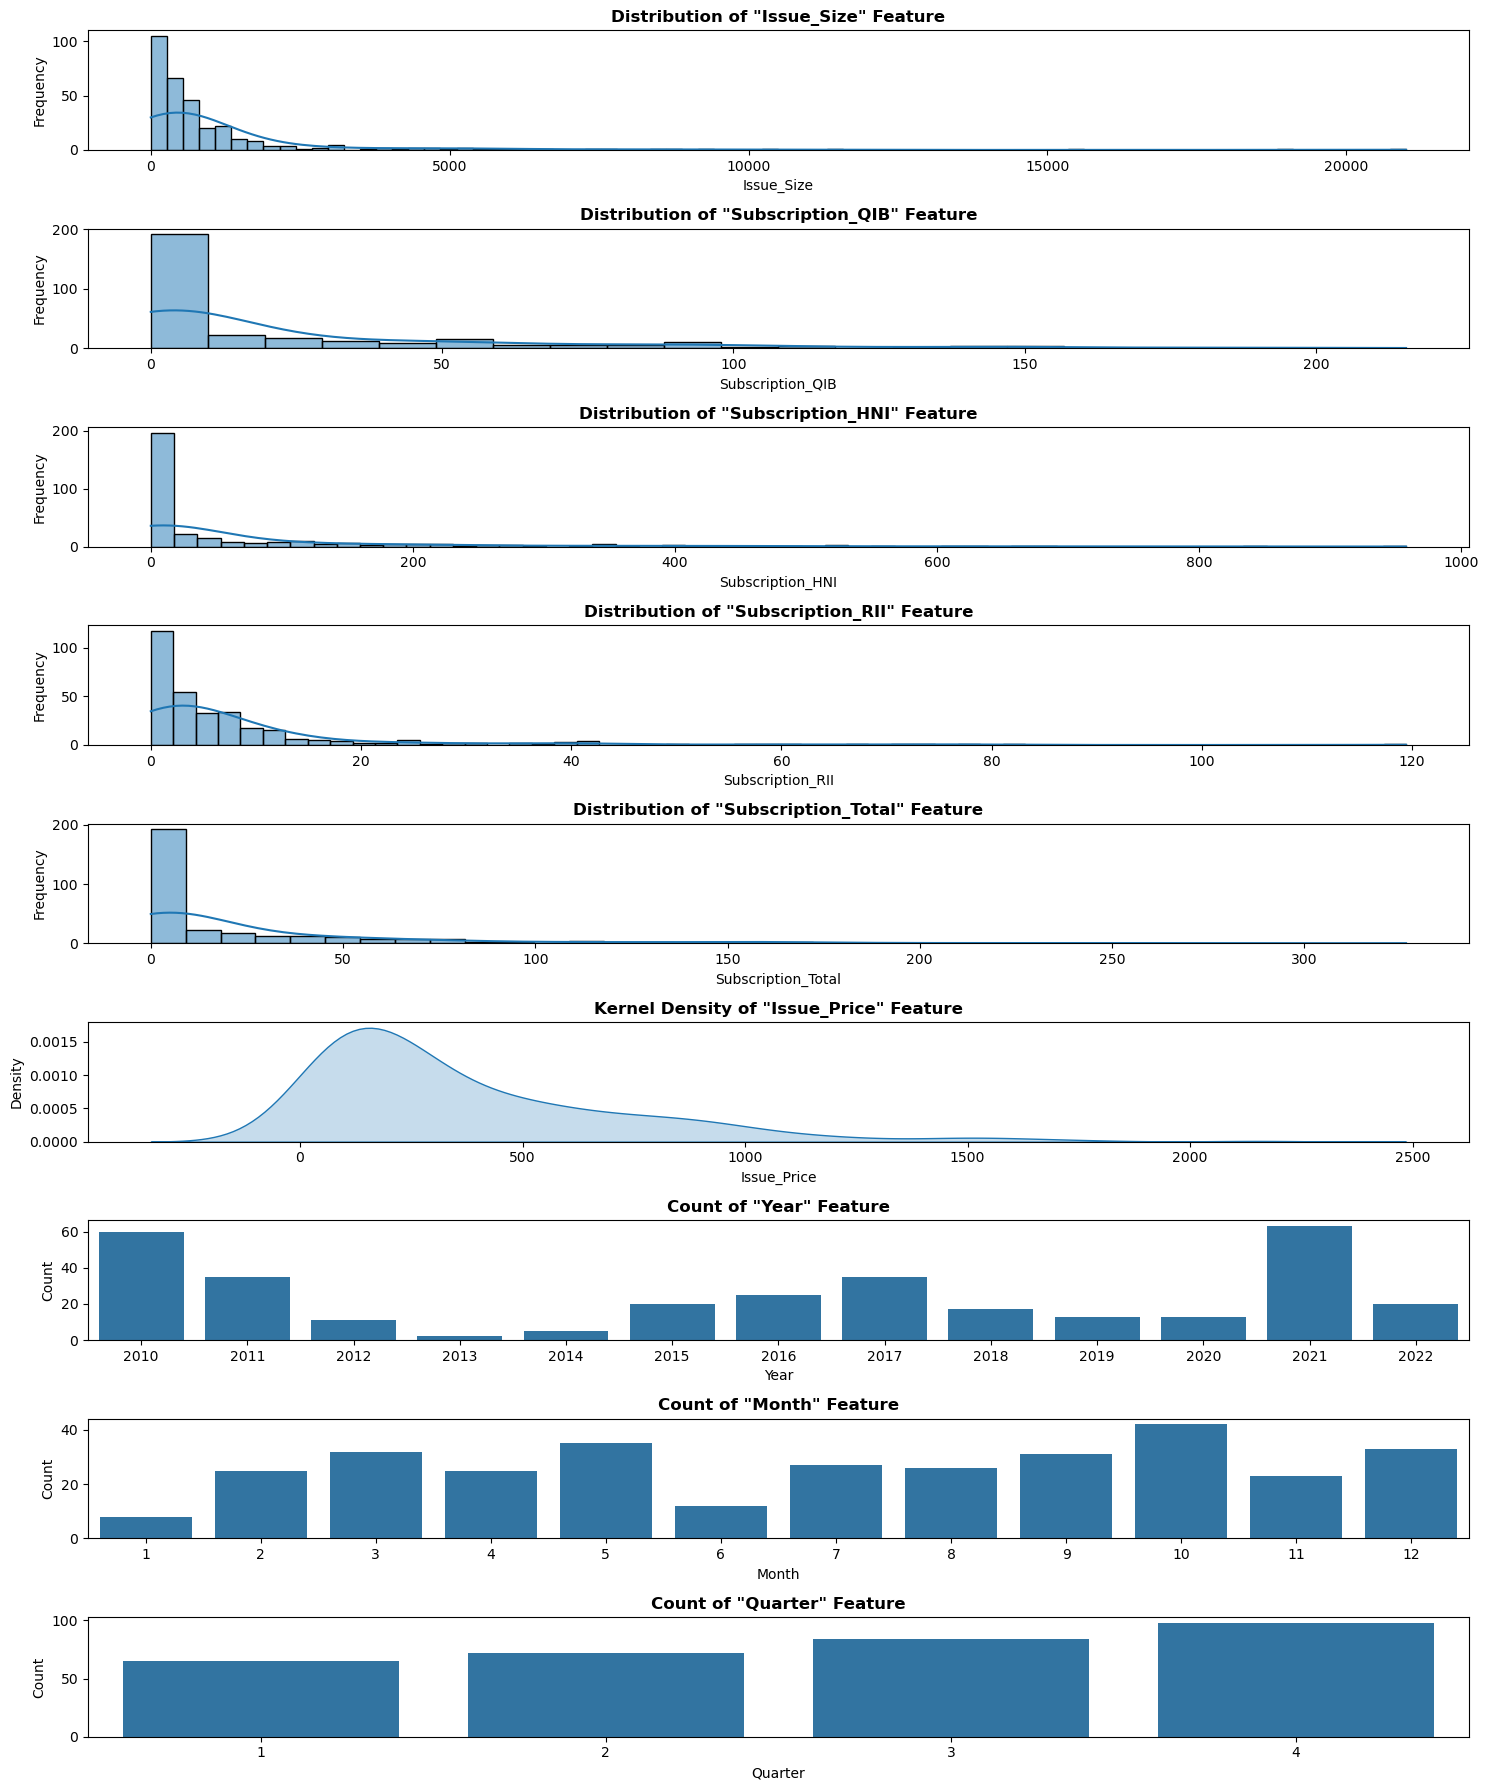

In [18]:
# Visualize feature and target columns
# Identify columns to plot, excluding 'Listing_Gains_Profit'
columns_to_plot = [col for col in ipo.columns if col != 'Listing_Gains_Profit']

# Create subplots dynamically based on the number of columns
num_columns = len(columns_to_plot)

# Set up the subplots with one extra subplot (num_columns + 1)
fig, axs = plt.subplots(num_columns, figsize=(15, num_columns * 2))

# Iterate over each column and plot them
for i, column in enumerate(columns_to_plot):
    if ipo[column].dtypes == 'int64' or ipo[column].dtypes == 'float64':
        if column == 'Issue_Price':
            sns.kdeplot(data=ipo, x=column, ax=axs[i], fill=True)
            axs[i].set_title(f'Kernel Density of "{column}" Feature', weight='bold')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Density')
        else:
            sns.histplot(data=ipo, x=column, ax=axs[i], kde=True)
            axs[i].set_title(f'Distribution of "{column}" Feature', weight='bold')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Frequency')
    else:  # For categorical data
        sns.countplot(data=ipo, x=column, ax=axs[i])
        axs[i].set_title(f'Count of "{column}" Feature', weight='bold')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Count')
        
plt.tight_layout()
plt.show()

#### Brief Interpretation

**Continuous Features** (Issue_Size, Subscription_QIB, Subscription_HNI, Subscription_RII, Subscription_Total, Issue_Price):

- These features exhibit right-skewed distributions, with most values concentrated on the lower end and a long tail stretching towards the higher end.
- This skewness indicates that while most IPOs have relatively small issue sizes, subscription rates, and prices, there are a few instances with very high values, representing significant outliers or rare events.
- The KDE plot for Issue_Price provides a smooth visualization of its distribution, showing that while most IPOs are priced lower, there are a few with much higher prices.

**Categorical Features** (Year, Month, Quarter):

- The Year feature shows varying counts of IPOs over different years, with notable peaks in 2010, 2017, 2021, and 2022, suggesting that these years saw more IPO activity. The distribution may reflect economic cycles or market conditions affecting IPO volumes.
- The Month feature is fairly evenly distributed, indicating that IPOs occur throughout the year without a strong monthly seasonality.
- The Quarter feature is also evenly distributed, showing that IPOs are similarly spread across all four quarters of the year, suggesting no particular quarter has significantly more IPO activity.

Overall, the distributions suggest that the continuous features are highly skewed with potential outliers, while the categorical features such as `Year`, `Month`, and `Quarter` demonstrate varied trends in IPO activity over time without strong seasonal patterns.

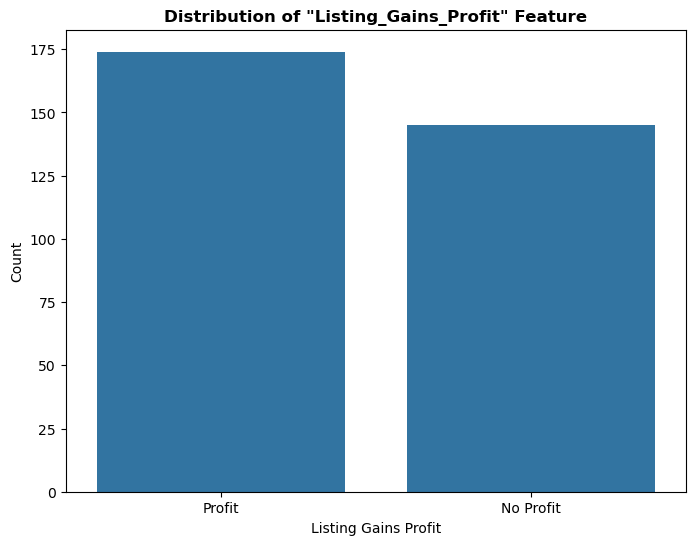

In [19]:
# Add the plot for the target variable separately
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=ipo, x=ipo['Listing_Gains_Profit'].map({1 : 'Profit', 0 : 'No Profit'}), ax=ax)
ax.set_title('Distribution of "Listing_Gains_Profit" Feature', weight='bold')
ax.set_xlabel('Listing Gains Profit')
ax.set_ylabel('Count')

plt.show()

As we have seen before, the countplot shows the distribution of the `Listing_Gains_Profit` target variable. The classes are relatively balanced, with a slightly higher proportion of IPOs resulting in a profit.

**2. Check for outliers in Features**

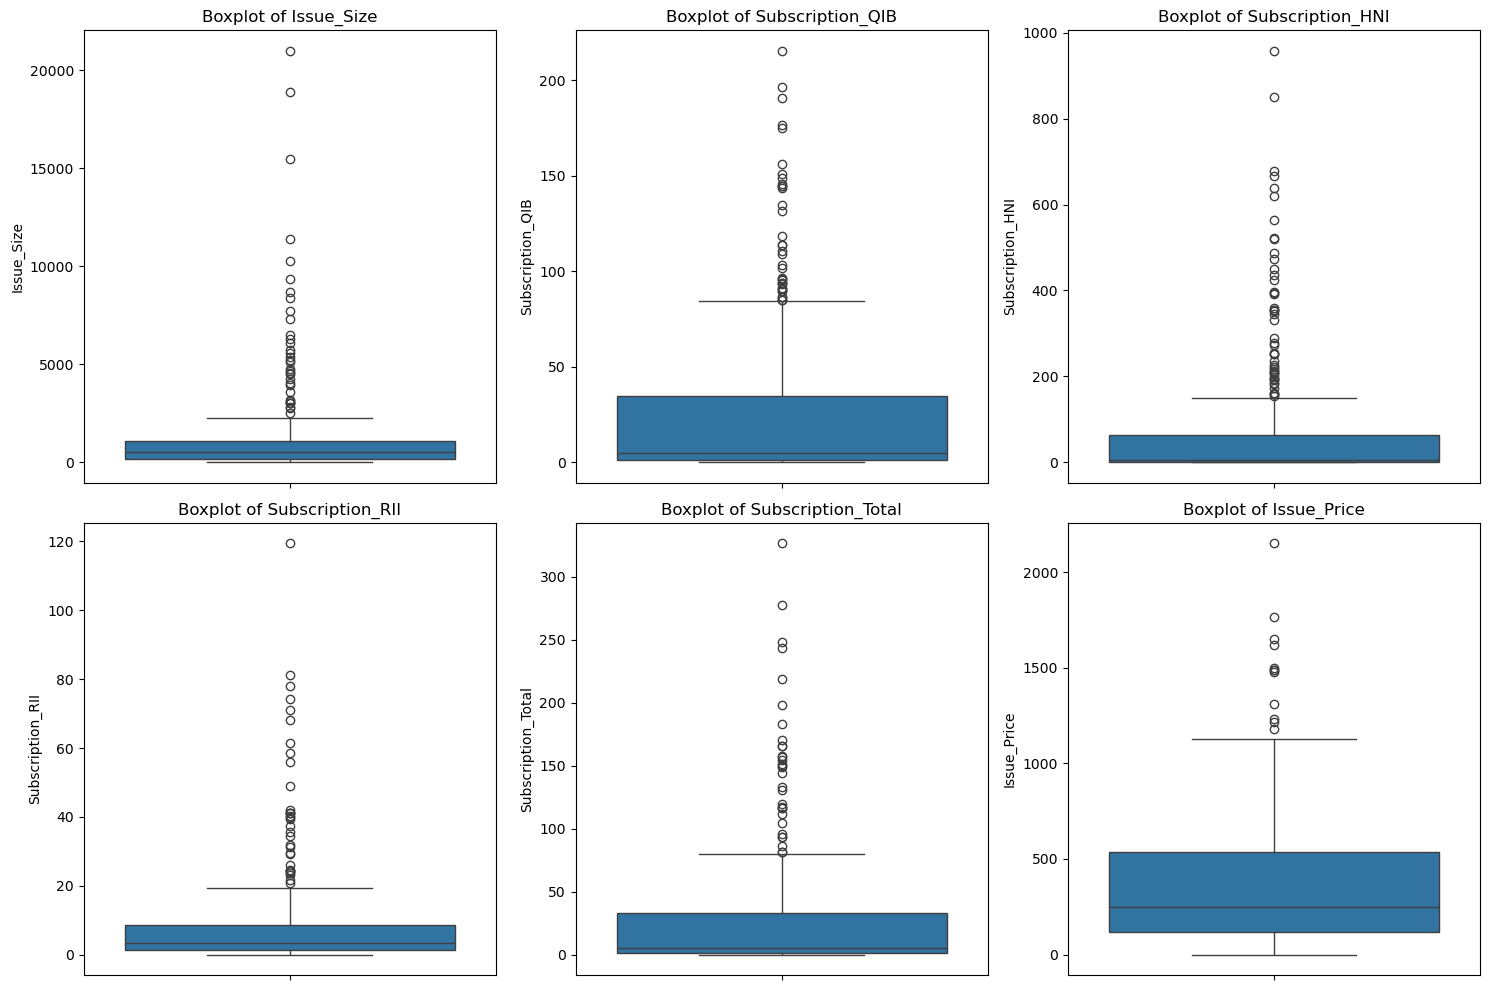

In [20]:
# List of continuous variables to check for outliers
continuous_vars = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total', 'Issue_Price']

# Create box plots for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=ipo, y=var)
    plt.title(f'Boxplot of {var}')
    
plt.tight_layout()
plt.show()

Lets check for outlier values using the `skew()` method

In [21]:
# Check outliers in features
outliers_pre = []

for feature in continuous_vars:
    outliers_pre.append(ipo[feature].skew())

outliers_pre

[4.853401606434454,
 2.143704625584823,
 3.0784448213212667,
 3.7082740836630137,
 2.9119071381074786,
 1.6968814842159945]

The values indicate, that all of the features do have outlier values. Values between -1 and 1 would be an indication for no outliers. Lets use the interquartile range next to remove outlier values.

In [22]:
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_clean = df.copy()
    
    # Loop through each column
    for col in df_clean.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        
        # Calculate Interquartile Range (IQR)
        iqr = q3 - q1
        
        # Define lower and upper bounds for outliers
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        # Cap the outliers to the lower and upper bounds
        df_clean[col] = df_clean[col].clip(lower, upper)
    
    return df_clean

# Apply the function and get the capped DataFrame
ipo_capped = cap_outliers(ipo)

In [23]:
# Check outlier values again after capping
outliers_post = []

for feature in continuous_vars:
    outliers_post.append(ipo_capped[feature].skew())

outliers_post

[1.2246204359225623,
 1.262734274613526,
 1.1816363175334872,
 1.12917087322117,
 1.2938804195699385,
 1.0847224584503858]

The new distribution is less skewed, although some features are not inside the -1 to 1 range. Lets recheck the boxplots:

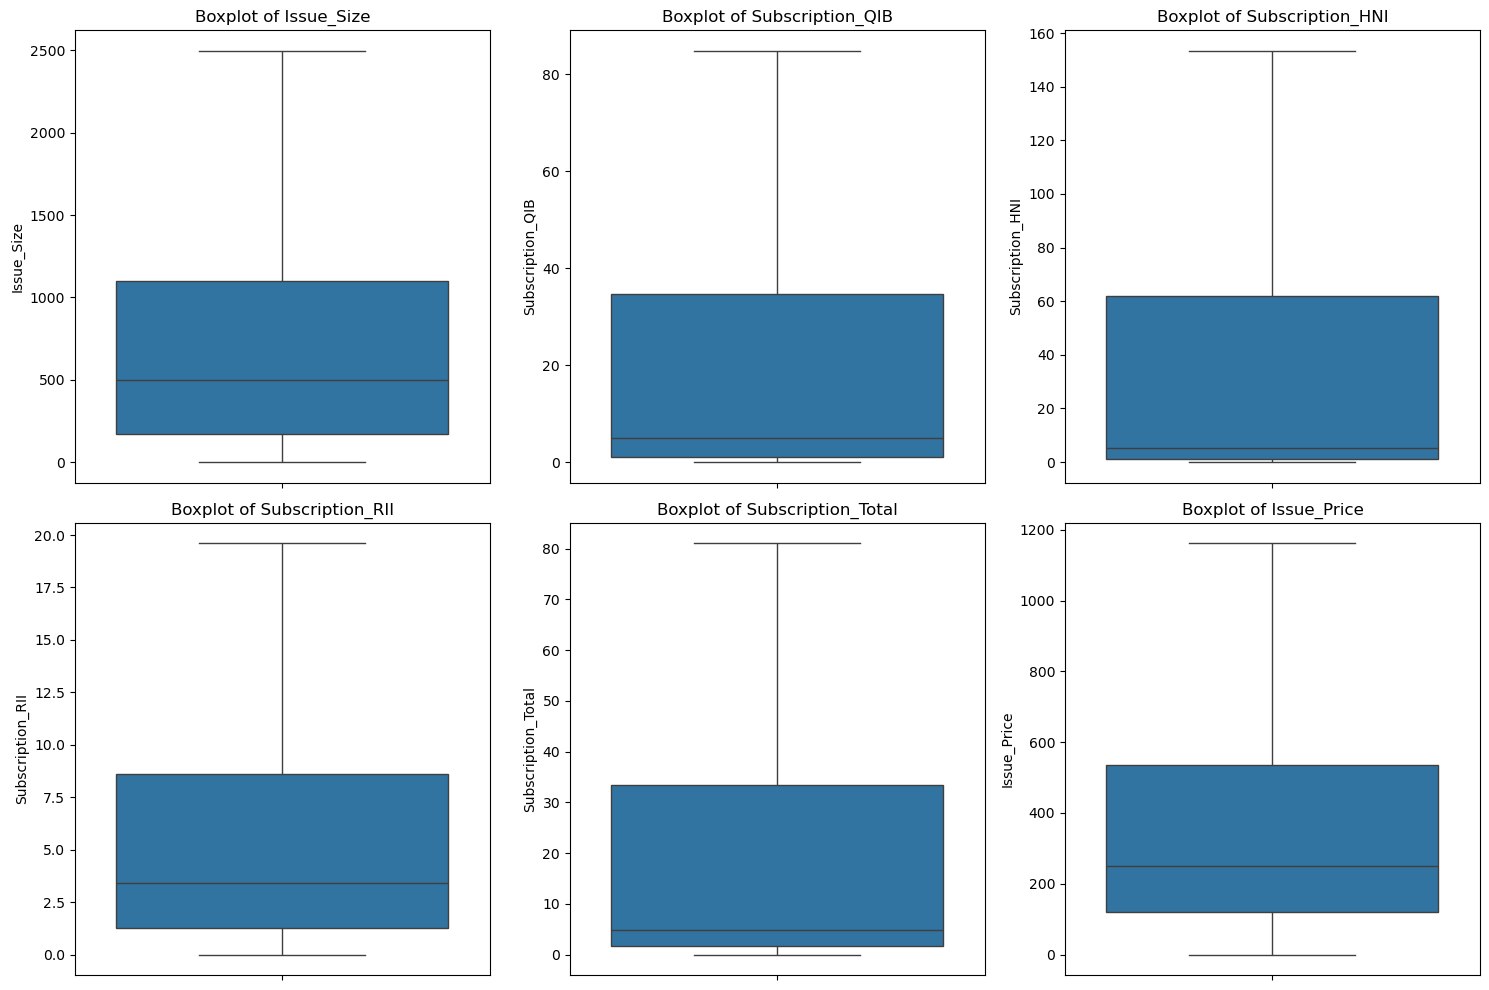

In [24]:
# Recheck the boxplots after capping the features
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=ipo_capped, y=var)
    plt.title(f'Boxplot of {var}')
    
plt.tight_layout()
plt.show()

After capping the outliers, the skewness of most distributions has been reduced, resulting in a more normalized range of data.

`Issue_Size`

- Before Capping: The distribution has many extreme outliers extending beyond 20,000, indicating a highly skewed distribution with some very large IPO issue sizes.
- After Capping: The outliers have been capped at approximately 2500. The boxplot now shows a more compact range, reducing the influence of extreme values. The distribution remains slightly skewed, but the spread is more controlled.

`Subscription_QIB` (Qualified Institutional Buyers)

- Before Capping: The original boxplot shows outliers well above 150, suggesting a few cases with exceptionally high QIB subscriptions.
- After Capping: Outliers are capped around 80, significantly reducing the range. This results in a more compact distribution while maintaining the overall shape.

`Subscription_HNI` (High Net-worth Individuals)

- Before Capping: Shows a significant number of outliers exceeding 800, suggesting that some IPOs had very high HNI subscriptions.
- After Capping: The distribution is now capped at around 150. The boxplot reveals a more compressed range, reducing the impact of extremely high values and making the data more suitable for modeling.

`ubscription_RII` (Retail Individual Investors)

- Before Capping: Outliers above 120 indicate a few instances of very high RII subscriptions.
- After Capping: The capped plot shows a reduced upper limit around 20. The overall spread of the data is more constrained, with fewer extreme values.

`Subscription_Total`

- Before Capping: Displays a number of outliers over 300, indicating a few IPOs with very high total subscriptions.
- After Capping: The maximum values are capped around 80. The data is now less spread out, providing a more normalized distribution.

`Issue_Price`

- Before Capping: There are outliers reaching above 2000, suggesting a few IPOs with very high issue prices.
- After Capping: Outliers are capped around 1200, which helps bring the distribution into a more manageable range without losing the overall pattern of the data.

**3. Visualize the Relationship Between Predictor Variables and the Target Variable**

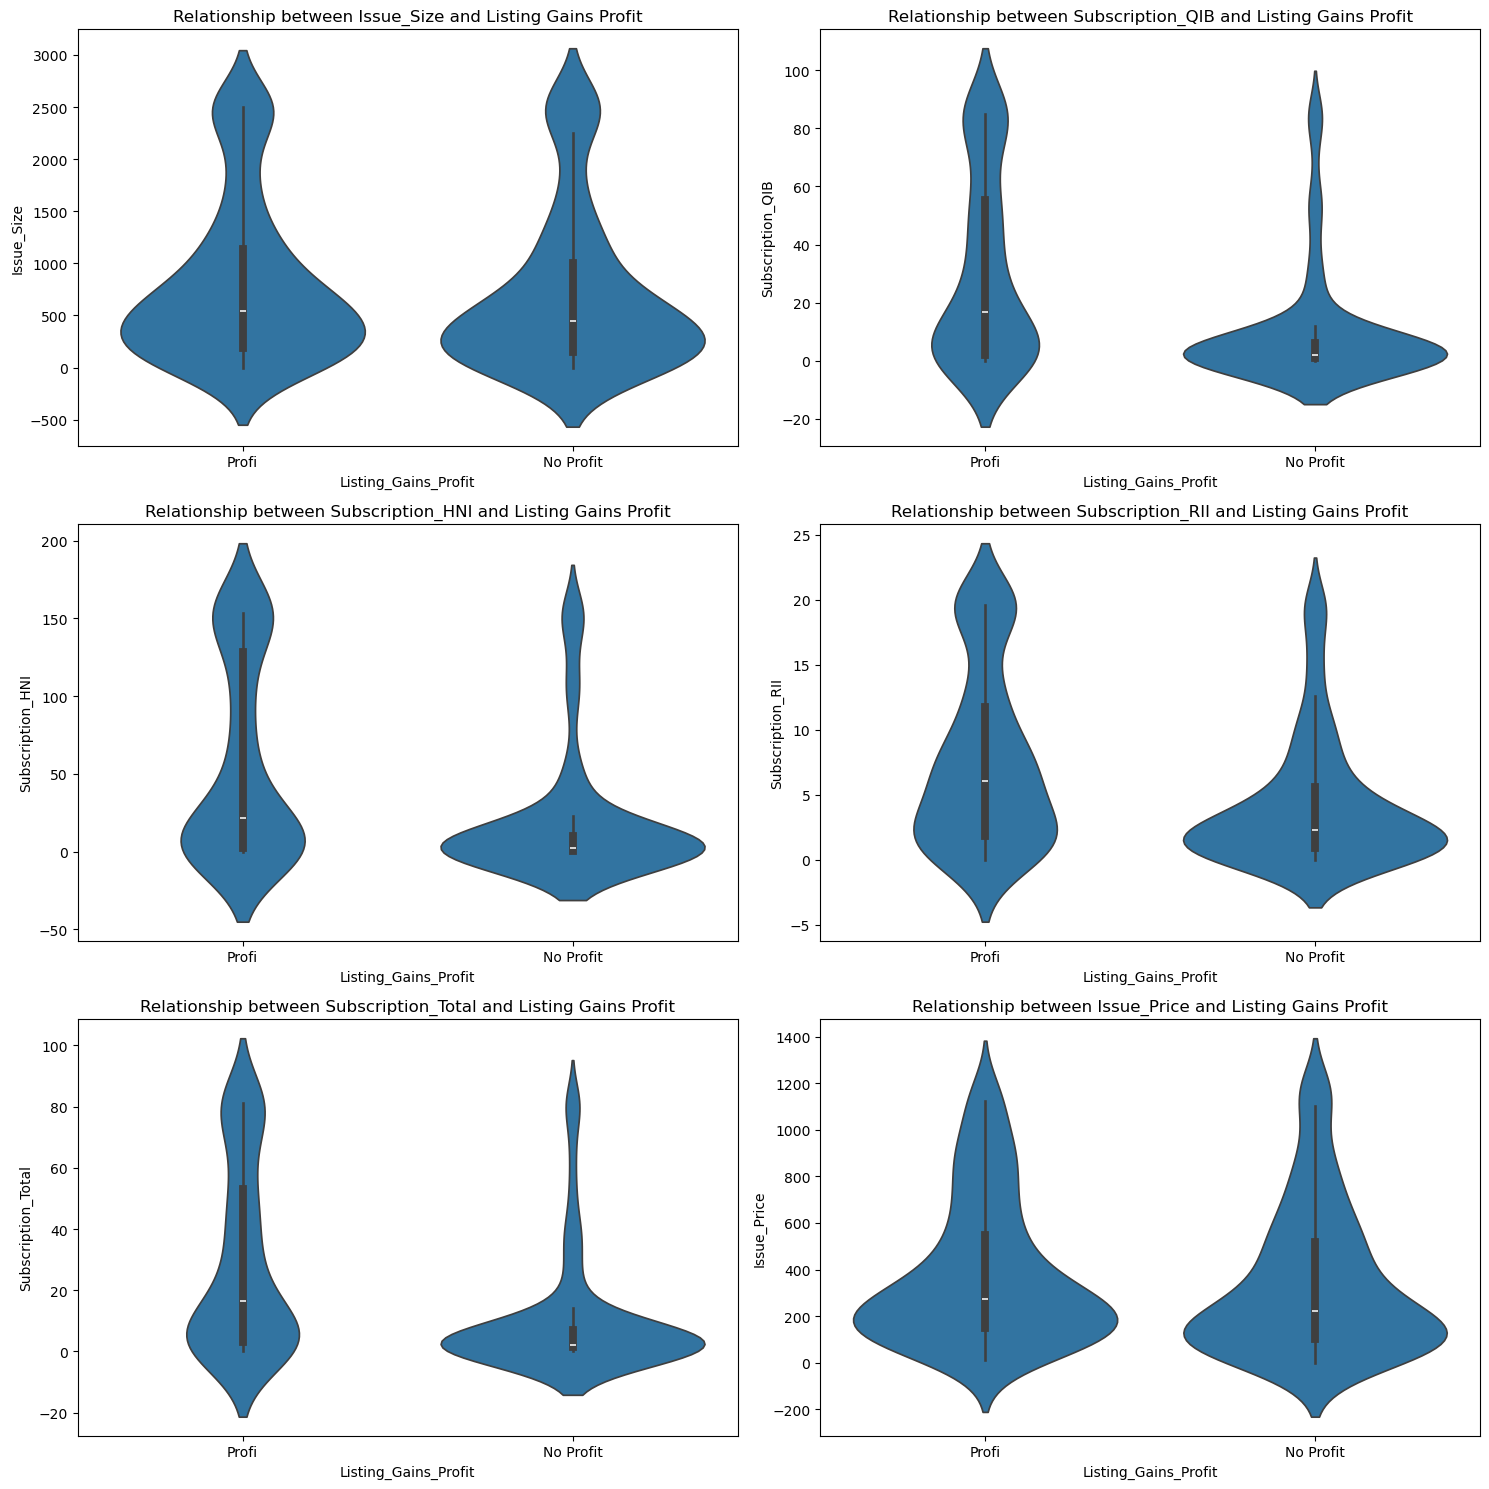

In [25]:
# Visualize relationships between numeric predictor variables and the target
predictor_vars = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI', 'Subscription_RII', 'Subscription_Total', 'Issue_Price']

plt.figure(figsize=(15, 15))

for i, var in enumerate(predictor_vars):
    plt.subplot(3, 2, i+1)
    sns.violinplot(data=ipo_capped, x=ipo_capped['Listing_Gains_Profit'].map({1 : 'Profi', 0 : 'No Profit'}), y=var)
    plt.title(f'Relationship between {var} and Listing Gains Profit')

plt.tight_layout()
plt.show()

The violin plots display the distribution of continuous predictor variables (Issue_Size, Subscription_QIB, Subscription_HNI, Subscription_RII, Subscription_Total, and Issue_Price) segmented by the target variable `Listing_Gains_Profit` (0 or 1).

Across all plots, we observe a similar pattern: IPOs that resulted in listing gains (Listing_Gains_Profit = 1) tend to have higher median values compared to those without gains (Listing_Gains_Profit = 0).

Notably, features like `Subscription_QIB`, `Subscription_HNI`, and `Subscription_Total` show distinct differences in their distributions between the two classes, suggesting that higher subscription levels from these groups may be associated with a greater likelihood of achieving listing gains.
The feature `Issue_Price` has less clear differentiation between the two classes, indicating it may be less predictive of listing gains compared to other variables.

**4. Check for Correlations Between Predictor Variables**

In [26]:
# Check new capped dataset
ipo_capped

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit,Year,Month,Quarter
0,189.80,48.4400,106.02,11.08,43.22,165.0,1,2010,2,1
1,328.70,59.3900,51.95,3.79,31.11,145.0,0,2010,2,1
2,56.25,0.9900,16.60,6.25,5.17,75.0,1,2010,2,1
3,199.80,1.1200,3.65,0.62,1.22,165.0,0,2010,2,1
4,0.00,0.5200,1.52,2.26,1.12,75.0,0,2010,2,1
...,...,...,...,...,...,...,...,...,...,...
314,840.13,42.4200,7.13,2.84,15.59,220.0,1,2022,8,3
315,562.10,27.4800,14.18,19.60,23.25,326.0,1,2022,9,3
316,792.00,0.5100,1.77,3.44,1.39,525.0,0,2022,9,3
317,755.00,84.8625,40.36,12.44,47.19,330.0,1,2022,9,3


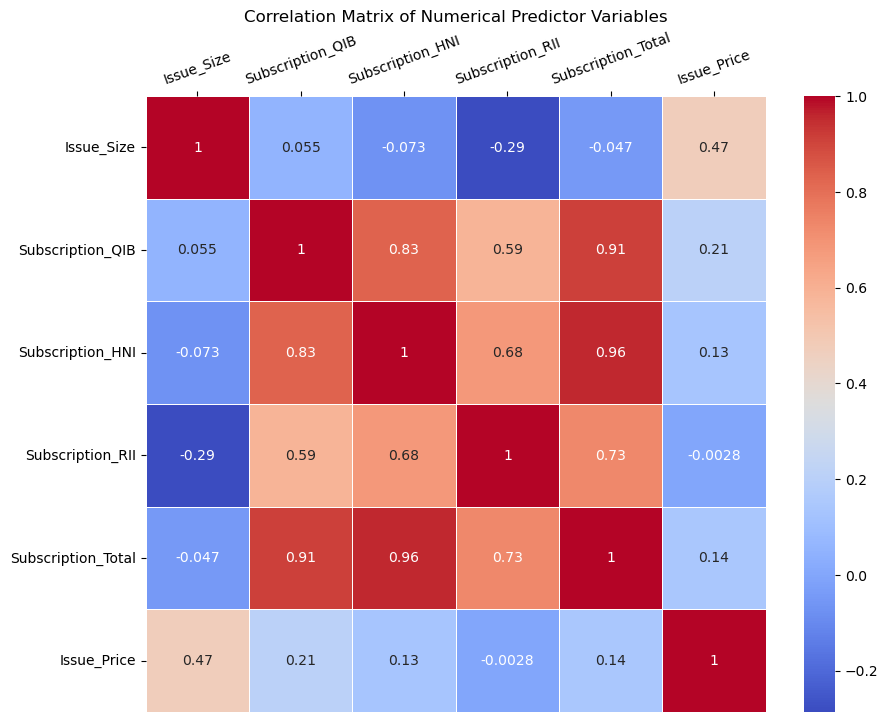

In [27]:
# Correlation matrix for numerical variables
correlation_matrix = ipo_capped[continuous_vars].corr()

# Heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
ax.xaxis.tick_top()
plt.xticks(rotation=20)
plt.title('Correlation Matrix of Numerical Predictor Variables')

plt.show()

The heatmap illustrates the correlations among the continuous variables in the dataset.

`Subscription_QIB`, `Subscription_HNI`, and `Subscription_Total` exhibit strong positive correlations with each other (0.77, 0.95, and 0.82), indicating that these subscription levels often increase together. This suggests potential multicollinearity, which might affect certain types of models that assume independent predictors.

`Issue_Size` and `Issue_Price` show low to moderate correlations with other variables, suggesting they are more independent features in this dataset.
The correlation between `Issue_Size` and `Subscription_Total` is low (-0.093), indicating that the size of the issue does not strongly influence the total subscription rate.

#### Setting the Target and Predictor Variables

In [28]:
# Split dataset in target and predictor variable
target = ['Listing_Gains_Profit']

predictors = list(set(list(ipo_capped.columns)) - set(target))

In [29]:
# Perform normalization on the predictor variables to scale their values to between 0 and 1 .
ipo_capped[predictors] = ipo_capped[predictors] / ipo_capped[predictors].max()

In [30]:
# Check normalized feature columns
ipo_capped[predictors].describe()

,Subscription_QIB,Quarter,Issue_Price,Subscription_HNI,Year,Subscription_RII,Subscription_Total,Issue_Size,Month
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.253601,0.668495,0.311793,0.263157,0.997002,0.309232,0.252489,0.305854,0.586729
std,0.342961,0.279014,0.268853,0.374477,0.002147,0.315147,0.335939,0.308308,0.277350
min,0.000000,0.250000,0.000000,0.000000,0.994065,0.000000,0.000000,0.000000,0.083333
25%,0.013551,0.500000,0.102454,0.008184,0.994560,0.065051,0.020304,0.067697,0.333333
50%,0.058212,0.750000,0.215239,0.033061,0.997527,0.174490,0.060849,0.198779,0.583333
75%,0.408131,1.000000,0.461472,0.404910,0.999505,0.439031,0.412182,0.440618,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After normalization of the feature variables, the maximum value is 1 and the minimum value is 0.

#### Creating the Holdout Validation Approach

In [31]:
# Extract the target values into a numpy array
y = ipo_capped[target].values

# Extract the feature values into a numpy array
X = ipo_capped[predictors].values

In [32]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [33]:
# Check count of train and test data
print(len(X_train), len(y_train), len(X_train), len(X_test))

223 223 223 96


In the provided tasks, a holdout validation approach is being implemented to prepare data for training and testing a machine learning model. First, the target variable (y) and predictor variables (X) are extracted from the `ipo_capped` DataFrame and converted to NumPy arrays using `.values`. T

Then, the `train_test_split` function from scikit-learn is used to split the data into training and test sets, with 70% of the data allocated to the training set and 30% to the test set. A random_state is set to ensure reproducibility of results. 

Finally, a quick check confirms that the split has been done correctly by printing the number of samples in the training and test datasets for both the predictors (X) and target (y).

#### Define the Deep Learning Classification Model

In [34]:
# Instantiate the model using Sequential
model = tf.keras.Sequential()

# Add first layer to NN
model.add(tf.keras.layers.Dense(units=512, input_shape=(X_train.shape[1],), activation='relu'))

## Add multiple layers to NN
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                          

In this step, we have defined the model by instantiating the sequential model class in TensorFlow's Keras. The model architecture is comprised of four hidden layers with relu as the activation function. The output layer uses a sigmoid activation function, which is a good choice for a binary classification model.

#### Compile and Train the initial Model

In [35]:
# Set optimizer and alpha
optimizer = tf.keras.optimizers.Adam(learning_rate=.01)

# compile the model with loss function, metrics and optimzer
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'], optimizer=optimizer)

# Show summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 81,153
Trainable params: 81,153
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Fit model to training data
model.fit(X_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.5157


In [37]:
# evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

7/7 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5964
Training Loss: 0.6906, Training Accuracy: 0.5964


In [38]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

3/3 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.7396
Test Loss: 0.6880, Test Accuracy: 0.7396


The deep learning model defined here is a Sequential model created using TensorFlow's Keras API. The model architecture is designed for binary classification tasks, specifically to predict listing gains for IPOs in the Indian market.

The model is compiled using the Adam optimizer with a learning rate set to 0.01. The BinaryCrossentropy loss function is employed, which is well-suited for handling class imbalance in binary classification tasks. Accuracy is chosen as the metric for evaluating the model's performance.

- Training Accuracy: After training for 7 epochs, the model achieves a training accuracy of 59.64% with a loss of 0.6906. This suggests that the model is learning the patterns in the training data to a moderate extent but still shows potential for improvement.

- Test Accuracy: When evaluated on the test data, the model achieves an accuracy of 73.96% with a loss of 0.6880. The notable improvement in accuracy from training to test data indicates that the model generalizes fairly well to unseen data, showcasing good predictive performance for this particular dataset.

The model demonstrates promising accuracy on the test dataset, significantly exceeding its training accuracy. This discrepancy suggests that while the model generalizes well to new data, there may still be opportunities to enhance its learning from the training data. Next steps involve refining the model architecture, optimizing hyperparameters, or introducing additional regularization techniques to improve its performance on the training set.

#### Adjust the Model using Functional API

In [39]:
# Define the input layer
inputs = tf.keras.Input(shape=(X_train.shape[1],))  

# Hidden layer 1
x = tf.keras.layers.Dense(256, activation='relu')(inputs)  
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)  # Dropout to prevent overfitting

# Hidden layer 2
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Hidden layer 3
x = tf.keras.layers.Dense(64, activation='relu')(x)  
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [40]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 0.8491 - accuracy: 0.5381 - val_loss: 0.6917 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7395 - accuracy: 0.5874 - val_loss: 0.6855 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7469 - accuracy: 0.5964 - val_loss: 0.6827 - val_accuracy: 0.6354 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7146 - accuracy: 0.5874 - val_loss: 0.6834 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6099 - val_loss: 0.6850 - val_accuracy: 0.5104 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.6323 - val_loss: 0.6881 - val_accuracy: 0.4792 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7159 - accurac

In [41]:
# Evaluate the model on the train set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
                                          
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

7/7 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.6278
Training Loss: 0.6769, Training Accuracy: 0.6278
3/3 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6354
Test Loss: 0.6827, Test Accuracy: 0.6354


In this approach, the deep learning classification model is built using TensorFlow's Keras Functional API, which provides more flexibility compared to the Sequential API. This model introduces batch normalization and dropout layers to improve generalization and prevent overfitting.

1. The Adam optimizer is used with a learning rate of 0.001,
2. Binary crossentropy is utilized to measure the performance of the model in binary classification.
3. EarlyStopping monitors the validation loss and stops training when no improvement is observed for 10 consecutive epochs, preventing overfitting.
4. ReduceLROnPlateau reduces the learning rate by a factor of 0.5 when the validation loss has stopped improving for 5 epochs, allowing the model to fine-tune weights at a slower pace when approaching minima.

- Training Accuracy: The model achieves a training accuracy of 62.78% with a loss of 0.6769. This moderate training accuracy suggests the model is learning from the data, but not fully capturing all the underlying patterns. The use of batch normalization and dropout layers may be limiting its ability to learn more effectively, leading to potential underfitting.

- Test Accuracy: On the test data, the model achieves an accuracy of 63.54% with a loss of 0.6827. Interestingly, the test accuracy is slightly higher than the training accuracy, indicating that the model generalizes well to unseen data. This could suggest that the model is not overfitting, but it still does not fully optimize learning from the training data.

The model's current architecture, which includes batch normalization and dropout layers, appears to prevent overfitting, as evidenced by the slightly higher test accuracy. However, the moderate accuracies for both training and test datasets suggest that the model might be underfitting.

#### Adjust the Model using Keras Tuner

In [42]:
# Create function for Keras Tuner
# Define parameters to use
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
    
    # Tune number of layers and number of neurons per layer
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=1024, step=32),
                                        activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])))
        model.add(tf.keras.layers.BatchNormalization())  # Batch normalization
        model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', 0.0, 1, step=0.1)))  # Dropout regularization
    
    # Output layer for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [43]:
# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Objective to maximize
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of models that should be built and fit for each trial
)

# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=500,
             validation_data=(X_test, y_test),
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.4375

Best val_accuracy So Far: 0.625
Total elapsed time: 00h 00m 18s


In [44]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)

Epoch 1/100
7/7 [==============================] - 1s 35ms/step - loss: 0.8991 - accuracy: 0.5785 - val_loss: 0.6943 - val_accuracy: 0.4375
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8245 - accuracy: 0.5336 - val_loss: 0.6880 - val_accuracy: 0.4375
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7814 - accuracy: 0.5874 - val_loss: 0.6963 - val_accuracy: 0.4375
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7343 - accuracy: 0.5785 - val_loss: 0.7127 - val_accuracy: 0.4375
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7365 - accuracy: 0.5650 - val_loss: 0.7141 - val_accuracy: 0.4375
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7484 - accuracy: 0.5874 - val_loss: 0.7199 - val_accuracy: 0.4375
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7306 - accuracy: 0.5830 - val_loss: 0.7324 - val_accuracy: 0.4375


In [45]:
# Evaluate the best model
train_loss, train_accuracy = best_model.evaluate(X_train, y_train)
print(f'Train Loss: {test_loss:.4f}, Train Accuracy: {test_accuracy:.4f}')

test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

7/7 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.5919
Train Loss: 0.6827, Train Accuracy: 0.6354
3/3 [==============================] - 0s 1ms/step - loss: 0.7324 - accuracy: 0.4375
Test Loss: 0.7324, Test Accuracy: 0.4375


The final model was developed using `Keras Tuner` to optimize the hyperparameters for a deep learning neural network. The `RandomSearch` method was utilized to explore a variety of hyperparameter combinations, ultimately selecting the configuration that maximized validation accuracy.

- Training Accuracy: The model achieved a training loss of 0.6827 and a training accuracy of 63.54%. This moderate training accuracy suggests that while the model is learning some patterns from the training data, it is not fully optimizing its learning capabilities. The accuracy indicates that the model could be underfitting, not capturing all underlying data patterns effectively.

- Test Accuracy: On the test data, the model's test loss is 0.7324, and the test accuracy is 43.75%. This drop in accuracy from training to test data suggests that the model struggles to generalize to unseen data. The relatively higher test loss compared to training loss also points toward a lack of performance on the test data.

The results from the Keras Tuner optimization show that while hyperparameter tuning was conducted, it did not lead to a model that significantly outperformed simpler models. The consistent training and test accuracy values indicate that the model is not overfitting but rather underfitting, implying it is too simplistic or the chosen architecture is not well-suited for the data.

#### Model Summary

- First Model: The first model achieved a training loss of 0.6906 and a training accuracy of 59.64%. The test loss was 0.6880, and the test accuracy was 73.96%. These results indicate a reasonably good fit, with the model showing better performance on the test data compared to the training data. This discrepancy suggests that the model generalizes well to unseen data, despite moderate learning on the training set. The close performance between training and test loss further indicates the model is not overfitting significantly and might be well-suited for the current dataset.

- Second Model: The second model had a training loss of 0.6769 and a training accuracy of 62.78%, with a test loss of 0.6827 and a test accuracy of 63.54%. While the training accuracy is relatively good, the test accuracy is lower, indicating that the model may not generalize well to unseen data. The use of batch normalization and dropout layers aimed at preventing overfitting might have led to this moderate learning rate. Although the training accuracy is decent, the gap in accuracy between training and test data suggests some potential overfitting, but the overall performance still shows a reasonable attempt at capturing the data's complexity.

- Third Model: The final model shows a training loss of 0.6827 and a training accuracy of 63.54%, with a test loss of 0.7324 and a test accuracy of 43.75%. This model performed worse than both the first and second models. The higher test loss combined with a low test accuracy implies that the model is underfitting, meaning it fails to capture the underlying data patterns during training. This result is despite the hyperparameter tuning using Keras Tuner, suggesting that the configurations explored may not have been suitable for this dataset or that more sophisticated techniques and deeper search spaces are needed.

#### Conclusion

In this project, a deep learning classification model was developed to predict listing gains for IPOs in the Indian market. The data preprocessing steps, including handling missing values, normalizing features, and transforming the target variable. A neural network was implemented using TensorFlow/Keras, and various hyperparameter tuning techniques were applied to optimize the model's performance.

While these results are reasonable for demonstrating capabilities in neural network implementation and optimization, given more time and resources there are several potential steps that could be further explored to enhance the model's performance:

- Cross-Validation: Implementing k-fold cross-validation could provide a more reliable estimate of the model's performance and ensure that it generalizes well across different subsets of the data.

- Handling Multicollinearity: Addressing multicollinearity among highly correlated features (e.g., subscription-related variables) using techniques like Principal Component Analysis (PCA) or feature selection could improve the model's robustness and reduce the risk of overfitting.

- Feature Engineering: Creating additional derived features or interactions between existing features could help capture non-linear relationships in the data, potentially boosting the model's predictive power.

- Ensemble Methods: Combining the deep learning model with other machine learning models, such as `XGBoost`, `Random Forest`, or `Gradient Boosting Machines`, through ensemble methods could lead to better performance and more robust predictions.

By exploring these potential steps, future iterations of the model could achieve higher accuracy and generalizability, providing more reliable predictions for IPO listing gains in the Indian market.